# A simple Earth system model

Here, we develop a simple ‘zero-dimensional’ model of the climate system. Whilst this clearly lack many of the processes we know are important for understanding climate, it does demonstrate some fundamental principles, based on concepts of radiative equilibrium.

Some interesting additional reading to this exercise would be the [AIP essay on Simple Models of Climate Change](https://history.aip.org/history/climate/simple.htm)

Assume the incoming solar radiation (radiative flux) is $342 Wm^{-2}$.

Assume that 31% of this is reflected back to space.

Assume the temperature T (K) of the Earth is constant over its surface and that it radiates as a black body.

We can then use the Stefan-Boltzmann law to give the radiative flux emitted by the Earth to balance the incoming radiation:

$$
J = \sigma T^{4},
$$
where J is the emitted radiative flux ($Wm^{-2}$) from the blackbody and $\sigma$ is the Stefan-Boltzmann constant, $\sigma = 5.670400 \cdot 10^{-8}\; Js^{-1}m^{-2}T^{-4}$. We can then calculate the effective temperature of the Earth (in Python) as:

In [1]:
albedo = 0.31
Jin = 342.0

def my_first_earth_system(albedo=0.31,Jin=342.0):
    '''
    A simple earth system model to give the effective
    planetary temperature (C). Function takes as input
    the planetary albedo (unitless) and the incoming
    solar radiation (in Wm^{-2}). Returns the effective
    temperature of the Earth (in degrees C).
    '''
    # Stefan-Boltzmann constant
    sigma = 5.670400e-8
    Jout = Jin*(1-albedo)
    T = (Jout/sigma)**(1/4.)
    # return temperature in C
    return T-273

print (my_first_earth_system(albedo,Jin))

-19.010726856336532


**Python hints:**

You will need to write some code similar to the following:

Text(0, 0.5, 'result / units')

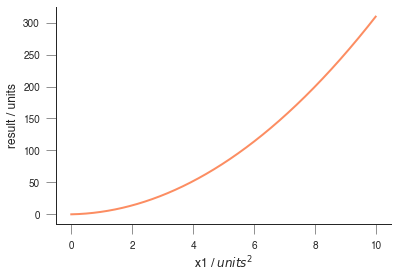

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Import the packages we need

def test_function(x1=1.0,x2=2.0):
    '''a test function for demo'''
    return x1 + x1**2 * x2

# generate array of x1 values from 0 to 10
x1 = np.arange(0.0,10.0,0.01)

# calculate test_function 
# with array of x1 values and given x2
result = test_function(x1=x1,x2=3.0)

# plotting commands
plt.plot(x1,result)
# use $$ for fancy (latex) maths formatting
plt.xlabel('x1 / $units^2$')
plt.ylabel('result / units')

#### Exercise 1

* Use this model to show what the sensitivity of the temperature is to albedo and the incoming solar radiation.

* What factors would cause variations in these terms?


Text(0, 0.5, 'Temperature / C')

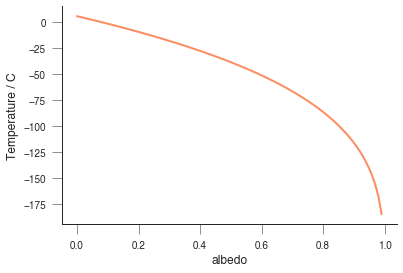

In [3]:
#### ANSWER: vary albedo for constant Jin
import numpy as np
import matplotlib.pyplot as plt

albedo = np.arange(0.0,1,0.01)
temp = my_first_earth_system(albedo=albedo,Jin=342.0)
plt.plot(albedo,temp)
plt.xlabel('albedo')
plt.ylabel('Temperature / C')

Text(0, 0.5, 'Temperature / C')

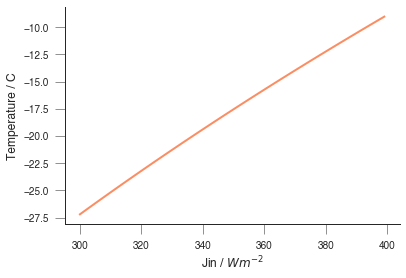

In [4]:
#### ANSWER vary Jin for consrtant albedo
import numpy as np
import matplotlib.pyplot as plt

Jin = np.arange(300,400,1)
temp = my_first_earth_system(albedo=0.31,Jin=Jin)
plt.plot(Jin,temp)
plt.xlabel('Jin / $Wm^{-2}$')
plt.ylabel('Temperature / C')

In [5]:
msg = '''
What factors would cause variations in these terms?

Jin at the top of atmosphere will vary with solar activity (solar min/max) with ~11 year
frequency and with variations in Earth-Sun distance (R^2 effect) over the seasons. 

It will also vary over the Earth surface due to projection effects (cosine of solar zenith angle)

Albedo varies spatially over the Earth surface, mainly die to land cover/land use variations. 
'''
print(msg)


What factors would cause variations in these terms?

Jin at the top of atmosphere will vary with solar activity (solar min/max) with ~11 year
frequency and with variations in Earth-Sun distance (R^2 effect) over the seasons. 

It will also vary over the Earth surface due to projection effects (cosine of solar zenith angle)

Albedo varies spatially over the Earth surface, mainly die to land cover/land use variations. 




#### Exercise 2

A grey body radiator is less efficient at emitting radiation than a blackbody. Such a concept is easily incorporated into the Stefan-Boltzmann law using an emissivity term epsilon, so $J = \epsilon\cdot\sigma T^4$.

* Assuming the actual average surface temperature is around 14 C, modify the code above to return the *effective emissivity* of the Earth.
* We assumed above that the effective (broadband) shortwave albedo was 0.31, so the effective (broadband) shortwave absorptance is $1-0.31=0.69$. The effective (broadband) longwave absorptance is equal to the effective (broadband) longwave emissivity through [Kirchoff’s law (of thermal radiation)](http://en.wikipedia.org/wiki/Kirchhoff%27s_law_of_thermal_radiation), assuming thermal equilibrium. What then is the effective (broadband) longwave albedo?
* Why do we use the words effective and broadband above?
* What impact would increasing the concentrations of greenhouse gases have on the effective (broadband) longwave albedo?

In [43]:
#### ANSWER

msg = '''

J = epsilon * sigma * T^4

so 

epsilon = J / (sigma * T^4)

'''
print(msg)



J = epsilon * sigma * T^4

so 

epsilon = J / (sigma * T^4)




In [44]:

def my_second_earth_system(albedo=0.31,Jin=342.0,T=14.0):
    '''
    A simple earth system model to give the effective
    planetary emissivity (unitless). 
    
    Function takes as input
    the planetary albedo (unitless), the incoming
    solar radiation (in Wm^{-2}) and temperature (C). 
    
    Returns the effective
    emissivity of the Earth (unitless).
    '''
    # Stefan-Boltzmann constant
    sigma = 5.670400e-8
    Jout = Jin*(1-albedo)
    # T C -> K
    TK = T + 273
    epsilon = Jout / (sigma * TK**4)
    return(epsilon)

print (my_second_earth_system(0.31,342.,14.))

0.6121054106937751


In [46]:
msg = '''
What then is the effective (broadband) longwave albedo?

emissivity and the absorptivity of a surface at a given temperature and wavelength are equal.
so ...

LW albedo = emissivity = 0.612
'''
print(msg)


What then is the effective (broadband) longwave albedo?

emissivity and the absorptivity of a surface at a given temperature and wavelength are equal.
so ...

LW albedo = emissivity = 0.612



In [47]:
msg = '''
Why do we use the words effective and broadband above?

The model we have takes no account of the trapping of LW radiation in 
the atmosphere (and some other effects)

As it does not include all of the physical mechanisms we understand to 
impact the relationship, it cannot be the true value, so we use the term
'effective', meaning the one that works under the assumptions we have made.
'''
print(msg)


Why do we use the words effective and broadband above?

The model we have takes no account of the trapping of LW radiation in 
the atmosphere (and some other effects)

As it does not include all of the physical mechanisms we understand to 
impact the relationship, it cannot be the true value, so we use the term
'effective', meaning the one that works under the assumptions we have made.



In [50]:
msg = '''
What impact would increasing the concentrations of 
greenhouse gases have on the effective (broadband) longwave albedo?

As the model stands, none. They are not considered in the model.

But taking a broader view of the question, if we increase the
effective downwelling LW reflectance from an atmosphere, we increase
the apparent LW albedo
'''
print(msg)


What impact would increasing the concentrations of 
greenhouse gases have on the effective (broadband) longwave albedo?

As the model stands, none. They are not considered in the model.

But taking a broader view of the question, if we increase the
effective downwelling LW reflectance from an atmosphere, we increase
the apparent LW albedo

